# Задание
1. Изучить пример, приведенный ниже.
2. Получить свой датасет у преподавателя.
3. Выбрать числовые признаки и таргет в датасете (признаки делаем числовыми или исключаем их).
2. Проанализировать результаты, полученные с помощью statsmodels.
3. Построить регрессионную зависимость (sklearn [тык](https://scikit-learn.ru/user_guide/)) с помощью метода наименьших квадратов, используя вычисление обратной матрицы. 
4. Построить регрессионную зависимость (sklearn) с помощью метода наименьших квадратов, используя метод градиентного спуска. 
4. Сравнить и описать результаты.

# Регрессионный анализ
[Wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import glob
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

Немного о pandas

[Документация](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) 

[Шпаргалка](https://smysl.io/blog/pandas/) 

In [ ]:
#combine all files in the list
extension = 'xlsx'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
combined = pd.concat([pd.read_excel(f) for f in all_filenames ])
#export to xlsx
combined.to_excel("/content/combined.xlsx", index=False, encoding='utf-8-sig')

In [ ]:
df = pd.read_excel('/content/combined.xlsx')

df['Humidity'] = df['Humidity'].replace([' None'], 0)
df['Humidity'] = df['Humidity'].astype(int)

df['Temperature'] = df['Temperature'].replace([' None'], 0)
df['Temperature'] = df['Temperature'].astype(int)

df['Pi'] = df['Pi'].replace({'pi':'', 'Pi': ''}, regex=True)
df['Pi'] = df['Pi'].astype(int)

dev = df['Device'].unique()
print(len(dev))
df['Device'] = df['Device'].replace(dev, [i for i in range(1, len(dev)+1)])

df['time'] = pd.to_datetime(df['time']).values.astype(np.int64) // 10 ** 9

del df['Experiment']

55


In [ ]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 10182
Total number of columns in dataset = 5


In [ ]:

df.head()

,Device,Humidity,Temperature,time,Pi
0,1,20,30,1532087986,4
1,1,20,30,1532087993,4
2,1,20,30,1532088002,4
3,1,20,30,1532088011,4
4,1,20,30,1532088018,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10182 entries, 0 to 10181
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Device       10182 non-null  int64
 1   Humidity     10182 non-null  int64
 2   Temperature  10182 non-null  int64
 3   time         10182 non-null  int64
 4   Pi           10182 non-null  int64
dtypes: int64(5)
memory usage: 397.9 KB


По df.info() видим, что пустых значений нет. RangeIndex: 200 и Non-Null Count у всех признаков = 200.


In [ ]:
target_col = "Humidity"

In [ ]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [ ]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)


# Линейная регрессия (statsmodels)



In [ ]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
results = model.fit()
results.params

const         -1.968659e+02
Device         1.398073e-01
Temperature   -6.249210e-01
time           1.615801e-07
Pi            -2.463331e-01
dtype: float64

In [ ]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     1298.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        07:46:58   Log-Likelihood:                -25021.
No. Observations:                7127   AIC:                         5.005e+04
Df Residuals:                    7122   BIC:                         5.009e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -196.8659     40.532     -4.857      

1. Коэффициенты регрессии модели Y = b0 + b1∙d1 + b2∙d2 + b3∙d3:



> Intercept = b0 = 393.9184

>b1 = 0.1583
>b2 = -0.7072
>b3 = -2.272e-07
>b4 = 1.1277


2. Коэффициент детерминации R-squared =  0.410, его скорректированная оценка Adj. R-squared = 0.410 - это означает, что регрессионная модель объясняет 40% вариации переменной Y.


3. Проверка значимости коэффициента детерминации:

>расчетное значение статистики критерия Фишера: F-statistic = 1236

>расчетный уровень значимости Prob (F-statistic) = 0

>так как значение Prob (F-statistic) < 0.05, то нулевая гипотеза R-squared = 0 НЕ ПРИНИМАЕТСЯ, т.е. коэффициент детерминации ЗНАЧИМ

4. Проверка значимости коэффициентов регрессии:

>расчетный уровень значимости P>|t| для b0, b1, b2 не превышает 0.05 - это означает, что коэффициенты регрессии значимы

>об этом же свидетельствует то, что доверительный интервал для коэффициентов регрессии ([0.025; 0.975]) не включает в себя точку 0

>расчетный уровень значимости P>|t| для b3 превышает 0.05. Нулевая гипотеза не отвергается. b3 не является значимым.
Нулевая гипотеза - коэффициет равен нулю, альтернативная - не равен.

5. значение t для b3 очень мало (чем выше значение t, тем выше шанс, что мы отвергаем нулевую гипотезу).

Также в таблице результатов содержится прочая информация по коэффициентам регрессии: стандартная ошибка Std.Err. 

# Ваше задание
Удаляем признаки, которые не являются значимыми, и повторяем обучение без них.

In [ ]:
df = df.drop(['Pi'], axis=1)
target_col = 'Humidity'

X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

X = (X - X.mean()) / X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.80, 
                                                    random_state=42)

X_with_constant = sm.add_constant(X_train)

X_with_constant = X_with_constant.astype(np.float64)
model = sm.OLS(y_train, X_with_constant)

results = model.fit()
print(results.params)
df.head()
print(results.summary())

X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)



const          30.636567
Device          2.213203
Temperature    -5.964078
time            0.459915
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     493.9
Date:                Mon, 05 Dec 2022   Prob (F-statistic):          5.23e-241
Time:                        07:46:58   Log-Likelihood:                -7137.6
No. Observations:                2036   AIC:                         1.428e+04
Df Residuals:                    2032   BIC:                         1.431e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
residual = y_test - y_pred

# Предпосылки линейной регрессии
Модель линейной регрессии можно построить не для любых данных, а только для данных, которые удовлетворяют ряду условий. И прежде, чем использовать регрессионное уравнение для прогнозирования, необходимо проверить выполнение этих условий. В ином случае наша модель не будет адекватна поставленной задаче, и ее использование будет бессмысленно.

# Наличие линейной зависимости
Первая и самая естественная предпосылка заключается в линейности модели. Под этим условием подразумевается корректность модели, выбор адекватных предикторов и отсутствие лишних предикторов. А также линейную зависимость целевой переменной от независимых переменных.

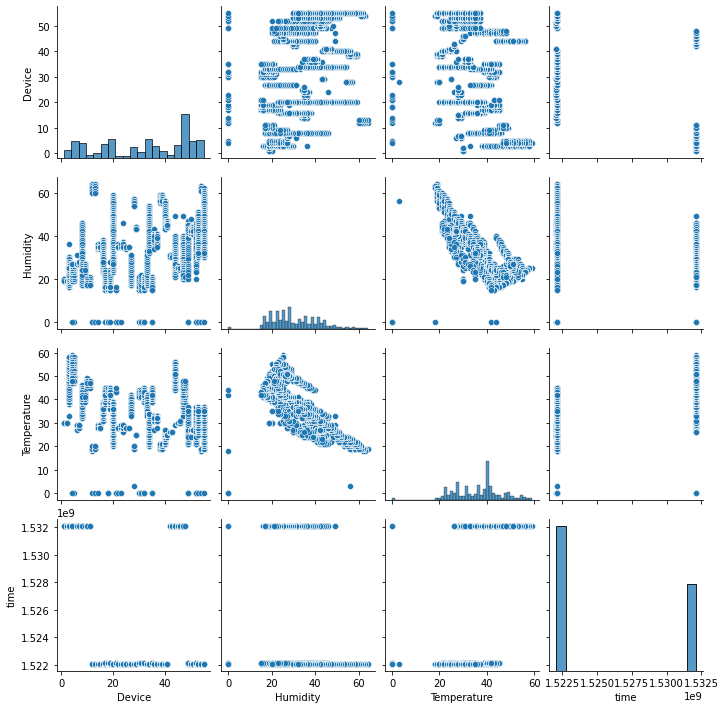

In [ ]:
sns.pairplot(df)

# Отсутствие мультиколлинеарности

Мультиколлинеарностью называют явление, которое заключается в наличии линейной зависимости между независимыми переменными (предикторами). Такое может возникать, например, при использовании признаков с естественной взаимосвязью: стаж работы и возраст (как правило, чем больше возраст - тем больше стаж и наоборот), количество детских садов и количество школ в районе (обычно детские сады бывают при школе, так что эти количества пропорционально взаимосвязаны) или баллы за экзамены IELTS и TOEFL (так как они экзамены проверяют примерно одни и те же знания и навыки)

Последствием мультиколлинеарности является расширение доверительных интервалов для коэффициентов, и модель получается очень неустойчивой и меняющейся от добавления даже 1-2 новых наблюдений. Разумеется, это не очень хорошая для нас ситуация, поэтому мы должны отбирать для модели только те предикторы, между которыми нет линейной связи.

Для того чтобы проверить данную предпосылку, нам необходимо построить матрицу корреляций для всех потенциальных предикторов, и отследить наличие сильной корреляционной связи. Нет четкой границы, которая отделяет допустимую взаимосвязь и недопустимую, но в ряде источников используется граница в районе 0.9. То есть, если между предикторами коэффициент корреляции по модулю больше, чем 0.9, то мы не можем оба этих предиктора использовать для модели.

Почитать:

[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C#:~:text=%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20(multicollinearity)%20%E2%80%94%20%D0%B2%20%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B5,%D0%BD%D0%B0%D0%BB%D0%B8%D1%87%D0%B8%D0%B5%20%D1%81%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9%20%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D1%84%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%B0%D0%BC%D0%B8)

[статья](https://towardsdatascience.com/why-multicollinearity-isnt-an-issue-in-machine-learning-5c9aa2f1a83a)


In [ ]:
cols_num = ["Device",
"Humidity",
"Temperature",
"time"]

correlation = df.corr().loc[cols_num, cols_num]
correlation

,Device,Humidity,Temperature,time
Device,1.000000,0.436451,-0.433898,-0.243409
Humidity,0.436451,1.000000,-0.617857,-0.355701
Temperature,-0.433898,-0.617857,1.000000,0.642898
time,-0.243409,-0.355701,0.642898,1.000000


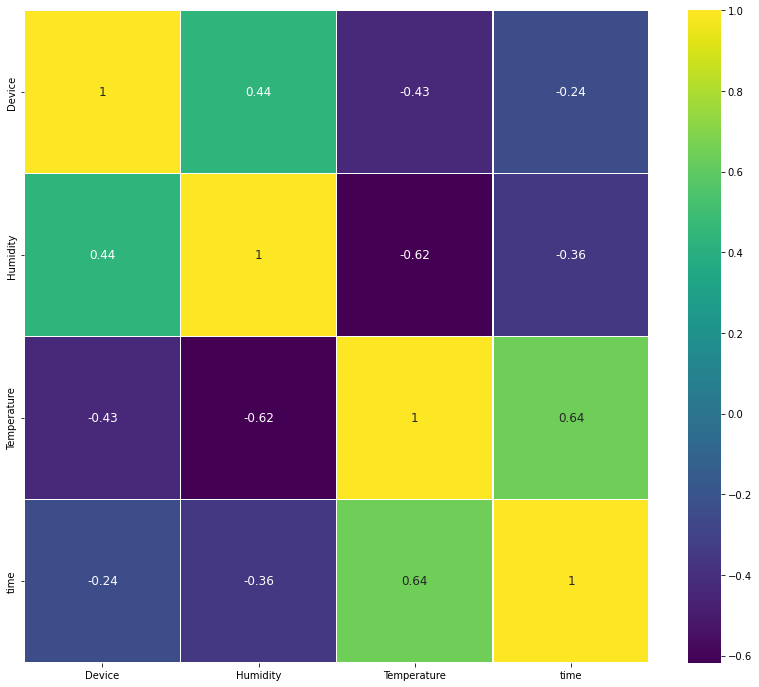

In [ ]:

fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

In [ ]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,Device,Temperature,time
vif,1.226834,1.977345,1.708495


# Нормальное распределение ошибок
После того как мы построили модель регрессии, мы можем вычислить ошибки (остатки): разницы между реальным значением $y$ и предсказанным $\hat{y}$. Важным условием является нормальность распределения этих ошибок. То есть, распределение остатков должно стремиться к нормальному распределению. Проверить выполняемость этого условия можно визуально с помощью гистограммы или с помощью специальных статистических тестов.

В целом, такое условие связано не напрямую с остатками, а с тем, что зависимая переменная должна быть распределена нормально для любых значений х. Однако такое условие проверить довольно сложно, поэтому можно проверить такое условие с помощью анализа распределения остатков.

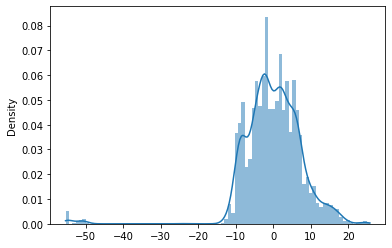

In [ ]:
sns.histplot(residual, kde=True, stat="density", linewidth=0)

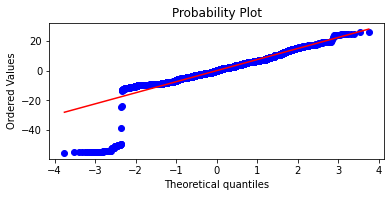

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [ ]:
np.mean(residual)

-0.05297443723378002

# Гомоскедантичность 
Гомоскедастичность ошибок заключается в том, что разброс остатков при любых значениях независимых переменных одинаковый. Предположим, что мы хотим предсказать стоимость квартиры по каким-то ее признакам. Если для квартир площадью 30-50 метров разброс ошибок будет маленький, а для квартир, площадью 50-70 метров разброс ошибок будет очень большой, то мы будем иметь дело с гетероскедастичностью. Такая ситуация нас не устраивает. Нам важно, чтобы качество модели было одно и то же при любых значениях независимой переменной.

[wiki](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BC%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C)

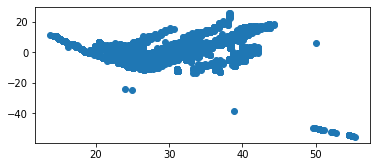

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

# Отсутствие автокорреляции остатков
Автокорреляция остатков (ошибок) возникает в ситуации, когда есть линейная взаимосвязь между остатками для одних значений предикторов и остатками для других значений предикторов. Такое может проявляться в силу естественных причин, как и в случае сс мультиколлинеарностью. Например, если мы предсказываем какие-то показатели для соседних регионов страны, то, скорее всего, они будут сильно взаимосвязаны просто в силу схожести характеристик этих объектов.

Автокорреляция влечет за собой некорректные результаты. Стандартные ошибки получаются несостоятельными, и мы не можем строить корректные доверительные интервалы и проверять гипотезы классическими способами.

[wiki](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F)

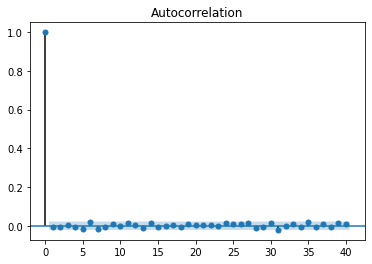

In [ ]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()


## Матрицами ([статья](https://habr.com/en/post/479398/))

## $\beta^* = (X^T \cdot X)^{-1}\cdot X^T \cdot Y$



In [ ]:
from numpy.linalg import matrix_power
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X_test = sm.add_constant(X_test)
X_train = sm.add_constant(X_train)

b = (matrix_power(X_train.transpose().dot(X_train), -1)).dot(X_train.transpose()).dot(y_train)

print('Matrix Coefficients: \n', b)

y_pred = np.dot(X_test, b.T)


print('Matrix Mean squared error: %.2f'
        % mean_squared_error(y_test, y_pred))

print('Matrix Coefficient of determination: %.2f'
        % r2_score(y_test, y_pred))


Matrix Coefficients: 
 [30.63656745  2.21320292 -5.96407795  0.45991537]
Matrix Mean squared error: 66.71
Matrix Coefficient of determination: 0.42


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Градиентным спуском  ([статья](https://habr.com/en/post/474602/))

Инициализируем случайную точку (часто берут просто нули):

$$
\beta_0 = (0\;\; 0 ...)
$$

Итеративно скачем по линиям уровня нашей функции, шагая каждый раз в сторону антиградиента с корректировкой шага $\eta_k$:

$$
\beta_{k+1} = \beta_k - \eta_{k}\cdot\nabla Q(\beta_k, X)
$$
 
Останавливаемся, когда срабатывает критерий останова. Например:

$$
|\beta_{k+1} - \beta_k| < \xi
$$

Пусть имеем 3 объекта $(X, Y)^i$ = $\left((d_i, 1), Y_i \right)$ с 3 признаками $d_1$, $d_2$ (+ константа). Хотим оценить обычную линейную модель:

$$
a(x) = \beta_1 \cdot d_1 + \beta_2 \cdot d_2 + \beta_0
$$

Тогда функционал ошибки как среднеквадратическая ошибка на нашей выборке выглядит следующим образом:

$$
Q(a, X) = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)^2
$$

Посчитаем вектор-градиент по всем оцениваемым параметрам:

$$
\nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; Q'_{\beta_0})
$$

Пример расчета производной по параметру у признака номер 1:

$$
Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} \cdot (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)
$$

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X_train, y_train)

print('Coefficients: \n', sgd_reg.coef_)


y_pred = sgd_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}', f'RMSE: {rmse}')
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))



Coefficients: 
 [15.30262374  1.55246177 -8.96282252  1.23755576]
MSE: 72.2411280346766 RMSE: 8.499478103664755
Coefficient of determination: 0.37


### Results

|             | OLS       | Clear OLS | Scikit OLS | GD         |
| ---         | ---       | ---       | ---        | ---        |
| const       | -196.8659 | 30.6366   | 30.63656745| 15.3026237	|
| Device      | 0.1398    | 2.2132    | 2.21320292 | 3.19290207 |
| Temperature | -0.6249   | -5.9641   | -5.96407795| -5.57987588| 
| time        | 1.616e-07 | 0.4599    | 0.45991537 | -0.51287222|


Решил проблему мультиколлинеарности в results.summary())

С помощью матричного метода удалось найти коэффициенты сильно приближенные к идеальным

Градиентным спуском с помощью SGDRegressor удалось найти верный коэффциент наклона линии регрессии


# По материалам
1. https://github.com/bhattbhavesh91/linear-regression-assumptions
2. https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b
3. https://habr.com/en/post/690414/
4. Еще каких-то хороших людей